<a href="https://colab.research.google.com/github/sarahem3799/Reddit_Stock_Correlation/blob/main/GWAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connections

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/Shareddrives/GWAR'

In [ ]:
pip install zstandard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 9.4 MB/s eta 0:00:00


In [ ]:
#Libraries

import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import requests
import nltk
from nltk.corpus import stopwords
import yfinance as yf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Filter using stock Name and ticker

## one time code we don't need again

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/Shareddrives/GWAR/sp500_stocks.csv")

In [ ]:
import pandas as pd
import requests

def fetch_sp500_list():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    # Fetch the HTML of the page
    response = requests.get(url)
    if response.status_code != 200:
        print("Failed to fetch the webpage")
        return None

    # Parse the HTML and read tables
    sp500_table = pd.read_html(response.text, attrs={"class": "wikitable sortable"})
    if sp500_table:
        sp500_df = sp500_table[0]
        # Assuming 'Symbol' and 'Security' are the columns for ticker and company name
        sp500_df = sp500_df[['Symbol', 'Security']]
        # Rename columns for clarity
        sp500_df.columns = ['Ticker', 'Company Name']
        return sp500_df
    else:
        print("No table found")
        return None

# Fetch S&P 500 stock list
sp500_list = fetch_sp500_list()

if sp500_list is not None:
    print(sp500_list.head())  # Print the first few rows of the DataFrame
    # Optionally, you can save this to a CSV file
    sp500_list.to_csv('sp500_stocks.csv', index=False)


In [ ]:
sp500_list.to_csv(folder_path + '/sp500_stocks.csv', index=False)

## to load the company name and ticker


In [ ]:
blacklist = {'I', 'ARE',  'ON', 'GO', 'NOW', 'CAN', 'UK', 'SO', 'OR', 'OUT', 'SEE', 'ONE', 'LOVE', 'U', 'STAY', 'HAS', 'BY', 'BIG', 'GOOD', 'RIDE', 'EOD', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}


In [ ]:
sp500_list =  pd.read_csv(folder_path + '/sp500_stocks.csv')

In [ ]:
sp500_list

In [ ]:
sp500_list[sp500_list['Ticker'] == 'YOLO']

# Take the whole files

In [ ]:
directory = "/content/drive/Shareddrives/GWAR/"

In [ ]:
# Pattern to match files ending with "_comments.zst"
comments_file_pattern = os.path.join(directory, "*_comments.zst")

# Initialize an empty list to store DataFrames
comments_dfs = []

# Loop through each file path
for file_path in glob.glob(comments_file_pattern):
    # Read the file and append the data directly to the final_df DataFrame
    df = pd.read_json(file_path, compression='zstd', lines=True)
    comments_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
comments_dfs = pd.concat(comments_dfs, ignore_index=True)

comments = comments_dfs['body','score','created_utc','id','link_id','parent_id','subreddit','subreddit_id']
comments

In [ ]:
sub_col = ['created_utc','id','score','subreddit','subreddit_id','title','selftext']


In [ ]:
# Pattern to match files ending with "_submissions.zst"
file_pattern = os.path.join(directory, "*_submissions.zst")

# Initialize an empty DataFrame to store the combined submission data
submissions_df = pd.DataFrame()

# Chunk size for reading the files
chunk_size = 1000  # Adjust the chunk size based on your available memory

# Loop through each file path
for file_path in glob.glob(file_pattern):
    # Initialize an empty list to store DataFrames for each chunk
    chunks = []

    # Iterate over chunks of data in the file
    for chunk in pd.read_json(file_path, compression='zstd', lines=True, chunksize=chunk_size):
        chunks.append(chunk)

    # Concatenate all chunks for this file into a single DataFrame
    file_df = pd.concat(chunks, ignore_index=True)

    # Concatenate the DataFrame for this file with the submissions_df DataFrame
    submissions_df = pd.concat([submissions_df, file_df], ignore_index=True)

# Extracting specific columns for submissions
submissions = submissions_df[['created_utc', 'id', 'score', 'subreddit', 'subreddit_id', 'title', 'selftext']]
submissions

In [ ]:
comments['link_id'] = comments['link_id'].str.replace('t3_', '')
merged_df = pd.merge(submissions, comments, left_on='id', right_on='link_id', how='left')
merged_df

#Legacy code

In [ ]:
import pandas as pd
your_filename = "/content/drive/Shareddrives/GWAR/smallstreetbets_comments.zst"
df = pd.read_json(your_filename,compression='zstd',lines=True)


In [ ]:
df.columns

In [ ]:
col = ['body','score','created_utc','id','link_id','parent_id','subreddit','subreddit_id']

In [ ]:
your_filename = "/content/drive/Shareddrives/GWAR/smallstreetbets_submissions.zst"
tsc = pd.read_json(your_filename,compression='zstd',lines=True)

In [ ]:
sub_col = ['created_utc','id','score','subreddit','subreddit_id','title','selftext']
tsc[sub_col]

In [ ]:
submissions = tsc[sub_col]
comments = df[col]

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [ ]:
blacklist = {'I', 'ARE',  'ON', 'GO', 'NOW', 'CAN', 'UK', 'SO', 'OR', 'OUT', 'SEE', 'ONE', 'LOVE', 'U', 'STAY', 'HAS', 'BY', 'BIG', 'GOOD', 'RIDE', 'EOD', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}

import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Convert blacklist to lowercase
blacklist = {word.lower() for word in blacklist}

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

def find_matches(row):
    for index, sp_row in sp500_list.iterrows():
        for col in ['basename']:
            stock_name = str(sp_row[col]).lower()
            stock_name_tokens = [token for token in stock_name.split() if token not in stop_words and token.lower() not in blacklist]
            if any(word.lower() in row['title'].lower().split() for word in stock_name_tokens):
                return sp_row['Ticker']
    return None

# Add a new column 'stock_name' to submissions dataframe
submissions['stock_name'] = submissions.apply(find_matches, axis=1)

submissions

In [ ]:
submissions[submissions['stock_name'].notna()]

In [ ]:
comments['link_id'] = comments['link_id'].str.replace('t3_', '')
merged_df = pd.merge(submissions, comments, left_on='id', right_on='link_id', how='left')
merged_df

## Validation Data

In [ ]:
import pandas as pd

# Define the path to the file
validation_data_path = '/content/drive/Shareddrives/GWAR/stock_tweets.csv'
validation_data_path

In [ ]:
#Randomly taking 10% of the Validation Data
df = pd.read_csv(validation_data_path)
Validation_data = df.sample(frac=0.1)
Validation_data = Validation_data[['Tweet', 'Stock Name']]
Validation_data

In [ ]:
Validation_data.to_csv('Validation_data.csv', index=False)


# Y finance code

In [ ]:
import yfinance as yf
import pandas as pd
import requests

def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = requests.get(url).text
    df = pd.read_html(html, header=0)[0]
    tickers = df['Symbol'].tolist()
    return tickers

sp500_tickers = get_sp500_tickers()
sp500_tickers.remove("BRK.B")
sp500_tickers.remove("BF.B")

data = yf.download(sp500_tickers,period='16y',interval='1d')
dates = data.index
prices = data["Adj Close"]
prices = pd.DataFrame(data = prices)
prices.to_csv("Stock_Prices_2008_2024.csv")

In [ ]:
prices = data["Adj Close"]
prices1 = pd.DataFrame(data = prices, index=False)


In [ ]:
prices

In [ ]:
prices.info()

In [ ]:
prices.describe()

In [ ]:
prices.shape

In [ ]:
prices.head()

#Date Cleaning

In [ ]:
import pandas as pd
  # inv = pd.read_json("/content/drive/Shareddrives/GWAR/investing_submissions.zst",compression='zstd',lines=True)
yfinance = pd.read_csv("/content/drive/Shareddrives/GWAR/Stock_Prices_2008_2024.csv")

In [ ]:
yfinance

,Date,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,2008-05-05,20.33,7.84,5.59,NaN,NaN,17.60,7.75,28.66,40.15,...,67.79,13.43,64.61,12.00,50.14,NaN,21.30,63.64,37.09,NaN
1,2008-05-06,20.46,7.57,5.64,NaN,NaN,17.46,7.70,28.58,40.25,...,68.42,13.67,66.01,11.99,50.45,NaN,21.37,63.99,36.98,NaN
2,2008-05-07,20.41,6.92,5.52,NaN,NaN,17.03,7.60,27.61,39.24,...,66.91,13.46,62.39,11.93,49.75,NaN,20.96,63.18,36.78,NaN
3,2008-05-08,20.56,6.64,5.60,NaN,NaN,17.03,7.66,28.06,40.00,...,66.91,13.59,62.47,11.95,50.37,NaN,21.08,62.38,37.69,NaN
4,2008-05-09,20.51,6.67,5.55,NaN,NaN,17.20,7.70,27.91,39.89,...,67.15,13.38,63.00,11.89,49.97,NaN,20.93,60.72,37.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,2024-04-29,139.59,13.98,173.50,161.52,162.25,107.27,91.25,303.16,473.07,...,252.43,31.18,96.98,54.48,119.64,132.59,143.19,121.71,300.01,159.70
4024,2024-04-30,137.04,13.51,170.33,162.64,158.57,105.97,93.54,300.91,462.83,...,251.14,30.17,91.65,53.73,118.27,130.70,141.25,120.28,314.56,159.24
4025,2024-05-01,138.69,13.58,169.30,161.72,156.16,106.29,95.80,298.66,469.39,...,254.70,30.20,92.73,53.78,116.03,130.96,135.33,119.56,309.05,158.50
4026,2024-05-02,137.52,13.86,173.03,160.81,158.33,105.92,95.17,300.34,476.57,...,252.49,31.01,95.27,53.79,116.24,135.99,135.07,118.46,312.71,167.23


In [ ]:
yfinance.isnull().sum()

Date       0
A          0
AAL        0
AAPL       0
ABBV    1174
        ... 
XYL      869
YUM        0
ZBH        0
ZBRA       0
ZTS     1195
Length: 501, dtype: int64

In [ ]:
yfinance['Date'] = pd.to_datetime(yfinance['Date'])
yfinance['Unix_timestamp'] = yfinance['Date'].apply(lambda x: int(x.timestamp()))
yfinance

,Date,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,Unix_timestamp
0,2008-05-05,20.33,7.84,5.59,NaN,NaN,17.60,7.75,28.66,40.15,...,13.43,64.61,12.00,50.14,NaN,21.30,63.64,37.09,NaN,1209945600
1,2008-05-06,20.46,7.57,5.64,NaN,NaN,17.46,7.70,28.58,40.25,...,13.67,66.01,11.99,50.45,NaN,21.37,63.99,36.98,NaN,1210032000
2,2008-05-07,20.41,6.92,5.52,NaN,NaN,17.03,7.60,27.61,39.24,...,13.46,62.39,11.93,49.75,NaN,20.96,63.18,36.78,NaN,1210118400
3,2008-05-08,20.56,6.64,5.60,NaN,NaN,17.03,7.66,28.06,40.00,...,13.59,62.47,11.95,50.37,NaN,21.08,62.38,37.69,NaN,1210204800
4,2008-05-09,20.51,6.67,5.55,NaN,NaN,17.20,7.70,27.91,39.89,...,13.38,63.00,11.89,49.97,NaN,20.93,60.72,37.10,NaN,1210291200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,2024-04-29,139.59,13.98,173.50,161.52,162.25,107.27,91.25,303.16,473.07,...,31.18,96.98,54.48,119.64,132.59,143.19,121.71,300.01,159.70,1714348800
4024,2024-04-30,137.04,13.51,170.33,162.64,158.57,105.97,93.54,300.91,462.83,...,30.17,91.65,53.73,118.27,130.70,141.25,120.28,314.56,159.24,1714435200
4025,2024-05-01,138.69,13.58,169.30,161.72,156.16,106.29,95.80,298.66,469.39,...,30.20,92.73,53.78,116.03,130.96,135.33,119.56,309.05,158.50,1714521600
4026,2024-05-02,137.52,13.86,173.03,160.81,158.33,105.92,95.17,300.34,476.57,...,31.01,95.27,53.79,116.24,135.99,135.07,118.46,312.71,167.23,1714608000


In [ ]:
yfinance.drop(columns=['Date'], inplace=True)
yfinance

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,Unix_timestamp
0,20.33,7.84,5.59,NaN,NaN,17.60,7.75,28.66,40.15,22.57,...,13.43,64.61,12.00,50.14,NaN,21.30,63.64,37.09,NaN,1209945600
1,20.46,7.57,5.64,NaN,NaN,17.46,7.70,28.58,40.25,23.02,...,13.67,66.01,11.99,50.45,NaN,21.37,63.99,36.98,NaN,1210032000
2,20.41,6.92,5.52,NaN,NaN,17.03,7.60,27.61,39.24,22.89,...,13.46,62.39,11.93,49.75,NaN,20.96,63.18,36.78,NaN,1210118400
3,20.56,6.64,5.60,NaN,NaN,17.03,7.66,28.06,40.00,22.63,...,13.59,62.47,11.95,50.37,NaN,21.08,62.38,37.69,NaN,1210204800
4,20.51,6.67,5.55,NaN,NaN,17.20,7.70,27.91,39.89,22.91,...,13.38,63.00,11.89,49.97,NaN,20.93,60.72,37.10,NaN,1210291200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,139.59,13.98,173.50,161.52,162.25,107.27,91.25,303.16,473.07,203.90,...,31.18,96.98,54.48,119.64,132.59,143.19,121.71,300.01,159.70,1714348800
4024,137.04,13.51,170.33,162.64,158.57,105.97,93.54,300.91,462.83,200.61,...,30.17,91.65,53.73,118.27,130.70,141.25,120.28,314.56,159.24,1714435200
4025,138.69,13.58,169.30,161.72,156.16,106.29,95.80,298.66,469.39,193.89,...,30.20,92.73,53.78,116.03,130.96,135.33,119.56,309.05,158.50,1714521600
4026,137.52,13.86,173.03,160.81,158.33,105.92,95.17,300.34,476.57,196.49,...,31.01,95.27,53.79,116.24,135.99,135.07,118.46,312.71,167.23,1714608000


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with the data shown above

# Reshape the DataFrame from wide to long format
melted_df = yfinance.melt(id_vars=['Unix_timestamp'], var_name='Stock_Ticker', value_name='Price')




In [ ]:
melted_df

,Unix_timestamp,Stock_Ticker,Price
0,1209945600,A,20.33
1,1210032000,A,20.46
2,1210118400,A,20.41
3,1210204800,A,20.56
4,1210291200,A,20.51
...,...,...,...
2013995,1714348800,ZTS,159.70
2013996,1714435200,ZTS,159.24
2013997,1714521600,ZTS,158.50
2013998,1714608000,ZTS,167.23


In [ ]:
melted_df.isnull().sum()

Unix_timestamp         0
Stock_Ticker           0
Price             116675
dtype: int64

In [ ]:
melted_df['Price'] = melted_df['Price'].fillna(method='ffill')
melted_df

,Unix_timestamp,Stock_Ticker,Price
0,1209945600,A,20.33
1,1210032000,A,20.46
2,1210118400,A,20.41
3,1210204800,A,20.56
4,1210291200,A,20.51
...,...,...,...
2013995,1714348800,ZTS,159.70
2013996,1714435200,ZTS,159.24
2013997,1714521600,ZTS,158.50
2013998,1714608000,ZTS,167.23


In [ ]:
melted_df.sort_values(by=['Stock_Ticker', 'Unix_timestamp'], inplace=True)

# Calculate the price 29 businees days later  for each Stock Ticker
melted_df['Price_After_29_business_days'] = melted_df.groupby('Stock_Ticker')['Price'].shift(-29)

melted_df

,Unix_timestamp,Stock_Ticker,Price,Price_After_29_business_days
0,1209945600,A,20.33,24.01
1,1210032000,A,20.46,24.05
2,1210118400,A,20.41,24.03
3,1210204800,A,20.56,24.37
4,1210291200,A,20.51,24.15
...,...,...,...,...
2013995,1714348800,ZTS,159.70,NaN
2013996,1714435200,ZTS,159.24,NaN
2013997,1714521600,ZTS,158.50,NaN
2013998,1714608000,ZTS,167.23,NaN


In [ ]:
melted_df['Price_change']= melted_df['Price_After_29_business_days'] - melted_df['Price']

In [ ]:
melted_df

,Unix_timestamp,Stock_Ticker,Price,Price_After_29_business_days,Price_change
0,1209945600,A,20.33,24.01,3.68
1,1210032000,A,20.46,24.05,3.59
2,1210118400,A,20.41,24.03,3.62
3,1210204800,A,20.56,24.37,3.81
4,1210291200,A,20.51,24.15,3.65
...,...,...,...,...,...
2013995,1714348800,ZTS,159.70,NaN,NaN
2013996,1714435200,ZTS,159.24,NaN,NaN
2013997,1714521600,ZTS,158.50,NaN,NaN
2013998,1714608000,ZTS,167.23,NaN,NaN


In [ ]:
melted_df[(melted_df['Unix_timestamp']==1556582400) & (melted_df['Stock_Ticker']=='UBER')]


,Unix_timestamp,Stock_Ticker,Price,Price_After_29_business_days,Price_change
1839533,1556582400,UBER,51.65,42.45,-9.20


In [ ]:


nan_price_rows = melted_df[melted_df['Price'].isnull()]

# Display the rows where the 'Price' is NaN
(nan_price_rows)

,Unix_timestamp,Stock_Ticker,Price,Price_After_29_business_days,Price_change


In [ ]:
melted_df['Price'].isnull().sum()

0

In [ ]:
melted_df.columns

Index(['Unix_timestamp', 'Stock_Ticker', 'Price',
       'Price_After_29_business_days', 'Price_change'],
      dtype='object')

In [ ]:
inv =  pd.read_csv("/content/drive/Shareddrives/GWAR/cleaned_data.tsv",sep = '\t')

In [ ]:
inv.head(5)

,archived,author,author_flair_richtext,author_flair_type,can_gild,contest_mode,created_utc,domain,edited,gilded,...,is_robot_indexable,all_awardings,total_awards_received,allow_live_comments,author_premium,treatment_tags,upvote_ratio,is_created_from_ads_ui,retrieved_utc,stock_ticker
0,1.00,[deleted],NaN,NaN,0.00,0.00,1226275200,self.stocks,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMD
1,1.00,StockMarketFunding,[],text,1.00,0.00,1227225600,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FSLR
2,1.00,StockMarketFunding,[],text,1.00,0.00,1228867200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CME
3,1.00,EconomyGuy,[],text,1.00,0.00,1229299200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FSLR
4,1.00,StockMarketFunding,[],text,1.00,0.00,1233187200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPM


In [ ]:
inv.columns

Index(['archived', 'author', 'author_flair_richtext', 'author_flair_type',
       'can_gild', 'contest_mode', 'created_utc', 'domain', 'edited', 'gilded',
       'hidden', 'hide_score', 'id', 'is_crosspostable',
       'is_reddit_media_domain', 'is_self', 'is_video', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_embed',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'retrieved_on', 'score',
       'secure_media_embed', 'selftext', 'send_replies', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_type', 'thumbnail', 'title',
       'url', 'whitelist_status', 'is_original_content', 'name', 'quarantine',
       'pinned', 'subreddit_subscribers', 'media_only', 'pwls', 'wls',
       'link_flair_background_color', 'author_created_utc', 'author_fullname',
       'is_meta', 'author_patreon_flair', 'gildings', 'is_robot_indexable',
       'all_awardings', 'total_awar

In [ ]:
inv

,archived,author,author_flair_richtext,author_flair_type,can_gild,contest_mode,created_utc,domain,edited,gilded,...,is_robot_indexable,all_awardings,total_awards_received,allow_live_comments,author_premium,treatment_tags,upvote_ratio,is_created_from_ads_ui,retrieved_utc,stock_ticker
0,1.00,[deleted],NaN,NaN,0.00,0.00,1226275200,self.stocks,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMD
1,1.00,StockMarketFunding,[],text,1.00,0.00,1227225600,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FSLR
2,1.00,StockMarketFunding,[],text,1.00,0.00,1228867200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CME
3,1.00,EconomyGuy,[],text,1.00,0.00,1229299200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FSLR
4,1.00,StockMarketFunding,[],text,1.00,0.00,1233187200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19454,0.00,Dakotahah,[],text,1.00,0.00,1672444800,self.stocks,0,0.00,...,1.00,[],0.00,0.00,0.00,[],0.53,0.00,NaN,IP
19455,0.00,Wrote_it2,[],text,1.00,0.00,1672444800,self.stocks,0,0.00,...,1.00,[],0.00,0.00,0.00,[],0.82,0.00,NaN,PEG
19456,0.00,bigbear0083,[],text,1.00,0.00,1672444800,self.stocks,0,0.00,...,1.00,[],0.00,0.00,1.00,[],0.63,0.00,NaN,TSLA
19457,0.00,[deleted],NaN,NaN,0.00,0.00,1672444800,NaN,1672513454,0.00,...,0.00,[],0.00,0.00,NaN,[],0.74,0.00,NaN,MSFT


In [ ]:
merged_df = pd.merge(inv, melted_df, left_on=['created_utc', 'stock_ticker'] , right_on=['Unix_timestamp', 'Stock_Ticker'] , how='inner')

In [ ]:
merged_df

,archived,author,author_flair_richtext,author_flair_type,can_gild,contest_mode,created_utc,domain,edited,gilded,...,treatment_tags,upvote_ratio,is_created_from_ads_ui,retrieved_utc,stock_ticker,Unix_timestamp,Stock_Ticker,Price,Price_After_29_business_days,Price_change
0,1.00,[deleted],NaN,NaN,0.00,0.00,1226275200,self.stocks,0,0.00,...,NaN,NaN,NaN,NaN,AMD,1226275200,AMD,3.04,2.02,-1.02
1,1.00,StockMarketFunding,[],text,1.00,0.00,1227225600,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,FSLR,1227225600,FSLR,92.81,153.71,60.90
2,1.00,StockMarketFunding,[],text,1.00,0.00,1228867200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,CME,1228867200,CME,24.56,18.72,-5.84
3,1.00,EconomyGuy,[],text,1.00,0.00,1229299200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,FSLR,1229299200,FSLR,111.20,145.88,34.68
4,1.00,StockMarketFunding,[],text,1.00,0.00,1233187200,stockmarketfunding.com,0,0.00,...,NaN,NaN,NaN,NaN,JPM,1233187200,JPM,17.41,15.88,-1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,[],text,1.00,0.00,1672272000,self.stocks,0,0.00,...,[],0.43,0.00,NaN,GOOGL,1672272000,GOOGL,88.45,94.57,6.12
15998,0.00,joshyuaaa,[],text,1.00,0.00,1672358400,self.stocks,0,0.00,...,[],0.35,0.00,NaN,TSLA,1672358400,TSLA,123.18,194.64,71.46
15999,0.00,[deleted],NaN,NaN,0.00,0.00,1672358400,NaN,0,0.00,...,[],0.52,0.00,NaN,TSLA,1672358400,TSLA,123.18,194.64,71.46
16000,0.00,AutoModerator,[],text,1.00,0.00,1672358400,self.stocks,0,0.00,...,[],0.88,0.00,NaN,PEG,1672358400,PEG,58.47,58.50,0.04


In [ ]:
null_counts = merged_df.isnull().sum()
null_counts

archived                         400
author                             0
author_flair_richtext           5245
author_flair_type               5245
can_gild                        3566
                                ... 
Unix_timestamp                     0
Stock_Ticker                       0
Price                              0
Price_After_29_business_days       0
Price_change                       0
Length: 71, dtype: int64

In [ ]:

columns_to_drop = list(merged_df.columns[merged_df.isnull().sum() > len(merged_df) / 4])

merged_df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
print(columns_to_drop)

['author_flair_richtext', 'author_flair_type', 'retrieved_on', 'name', 'link_flair_background_color', 'author_created_utc', 'author_fullname', 'author_patreon_flair', 'gildings', 'is_robot_indexable', 'all_awardings', 'total_awards_received', 'allow_live_comments', 'author_premium', 'treatment_tags', 'upvote_ratio', 'is_created_from_ads_ui', 'retrieved_utc']


In [ ]:
final_Data_null_count= merged_df.isnull().sum()
final_Data_null_count

archived                         400
author                             0
can_gild                        3566
contest_mode                    1844
created_utc                        0
domain                            61
edited                             0
gilded                           110
hidden                          1996
hide_score                      3484
id                                 0
is_crosspostable                2789
is_reddit_media_domain          2896
is_self                            0
is_video                        2481
link_flair_richtext             3782
link_flair_text_color           3785
link_flair_type                 3782
locked                          1248
media_embed                        0
no_follow                       3514
num_comments                       0
num_crossposts                  2789
over_18                            0
parent_whitelist_status         2789
permalink                          0
score                              0
s

In [ ]:
import matplotlib.pyplot as plt

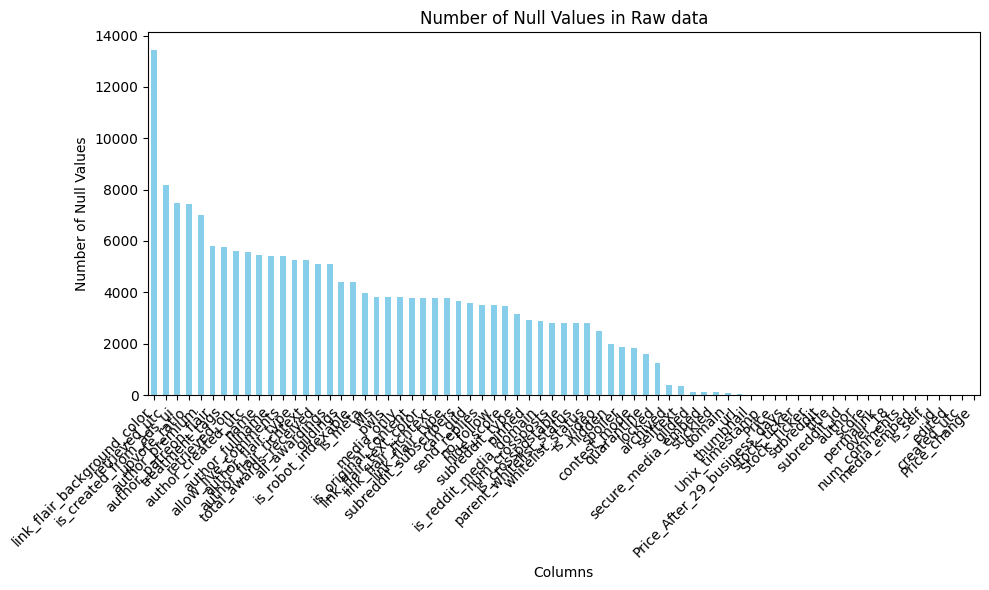

In [ ]:
null_counts_sorted = null_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
null_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Null Values in Raw data')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

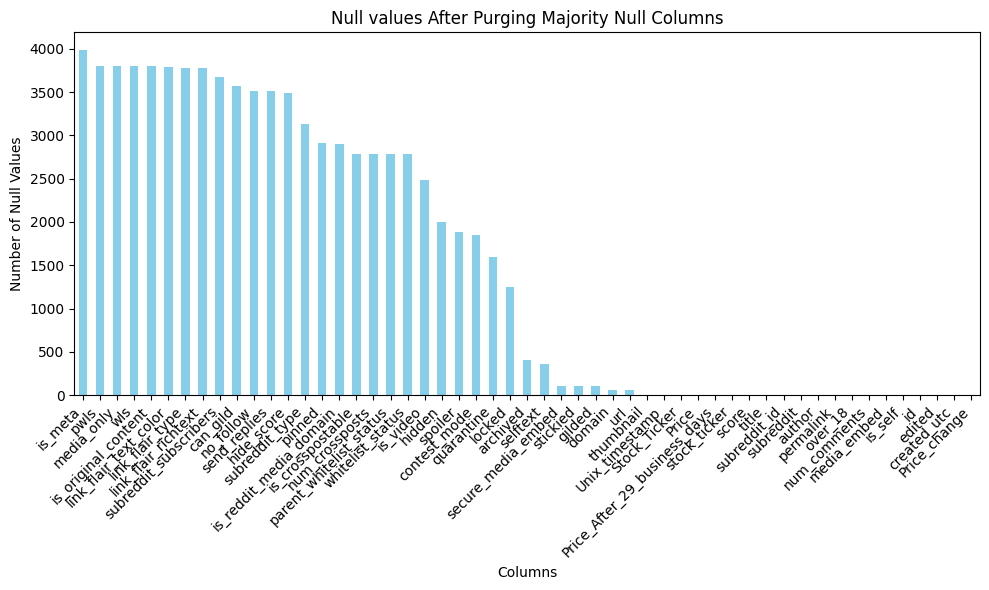

In [ ]:
final_Data_null_count_sorted = final_Data_null_count.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
final_Data_null_count_sorted.plot(kind='bar', color='skyblue')
plt.title('Null values After Purging Majority Null Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
merged_df = merged_df.drop('Price_After_29_business_days', axis=1)
merged_df

,archived,author,can_gild,contest_mode,created_utc,domain,edited,gilded,hidden,hide_score,...,subreddit_subscribers,media_only,pwls,wls,is_meta,stock_ticker,Unix_timestamp,Stock_Ticker,Price,Price_change
0,1.00,[deleted],0.00,0.00,1226275200,self.stocks,0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,AMD,1226275200,AMD,3.04,-1.02
1,1.00,StockMarketFunding,1.00,0.00,1227225600,stockmarketfunding.com,0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,FSLR,1227225600,FSLR,92.81,60.90
2,1.00,StockMarketFunding,1.00,0.00,1228867200,stockmarketfunding.com,0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,CME,1228867200,CME,24.56,-5.84
3,1.00,EconomyGuy,1.00,0.00,1229299200,stockmarketfunding.com,0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,FSLR,1229299200,FSLR,111.20,34.68
4,1.00,StockMarketFunding,1.00,0.00,1233187200,stockmarketfunding.com,0,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,JPM,1233187200,JPM,17.41,-1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,1.00,0.00,1672272000,self.stocks,0,0.00,0.00,0.00,...,5045461.00,0.00,6.00,6.00,0.00,GOOGL,1672272000,GOOGL,88.45,6.12
15998,0.00,joshyuaaa,1.00,0.00,1672358400,self.stocks,0,0.00,0.00,0.00,...,5045457.00,0.00,6.00,6.00,0.00,TSLA,1672358400,TSLA,123.18,71.46
15999,0.00,[deleted],0.00,0.00,1672358400,NaN,0,0.00,0.00,0.00,...,5045444.00,0.00,6.00,6.00,0.00,TSLA,1672358400,TSLA,123.18,71.46
16000,0.00,AutoModerator,1.00,0.00,1672358400,self.stocks,0,0.00,0.00,0.00,...,5045453.00,0.00,6.00,6.00,0.00,PEG,1672358400,PEG,58.47,0.04


In [ ]:
merged_df.columns

Index(['archived', 'author', 'can_gild', 'contest_mode', 'created_utc',
       'domain', 'edited', 'gilded', 'hidden', 'hide_score', 'id',
       'is_crosspostable', 'is_reddit_media_domain', 'is_self', 'is_video',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_embed', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'score',
       'secure_media_embed', 'selftext', 'send_replies', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_type', 'thumbnail', 'title',
       'url', 'whitelist_status', 'is_original_content', 'quarantine',
       'pinned', 'subreddit_subscribers', 'media_only', 'pwls', 'wls',
       'is_meta', 'stock_ticker', 'Unix_timestamp', 'Stock_Ticker', 'Price',
       'Price_change'],
      dtype='object')

In [ ]:
merged_df.dtypes

archived                   float64
author                      object
can_gild                   float64
contest_mode               float64
created_utc                  int64
domain                      object
edited                       int64
gilded                     float64
hidden                     float64
hide_score                 float64
id                          object
is_crosspostable           float64
is_reddit_media_domain     float64
is_self                       bool
is_video                   float64
link_flair_richtext         object
link_flair_text_color       object
link_flair_type             object
locked                     float64
media_embed                 object
no_follow                  float64
num_comments                 int64
num_crossposts             float64
over_18                       bool
parent_whitelist_status     object
permalink                   object
score                        int64
secure_media_embed          object
selftext            

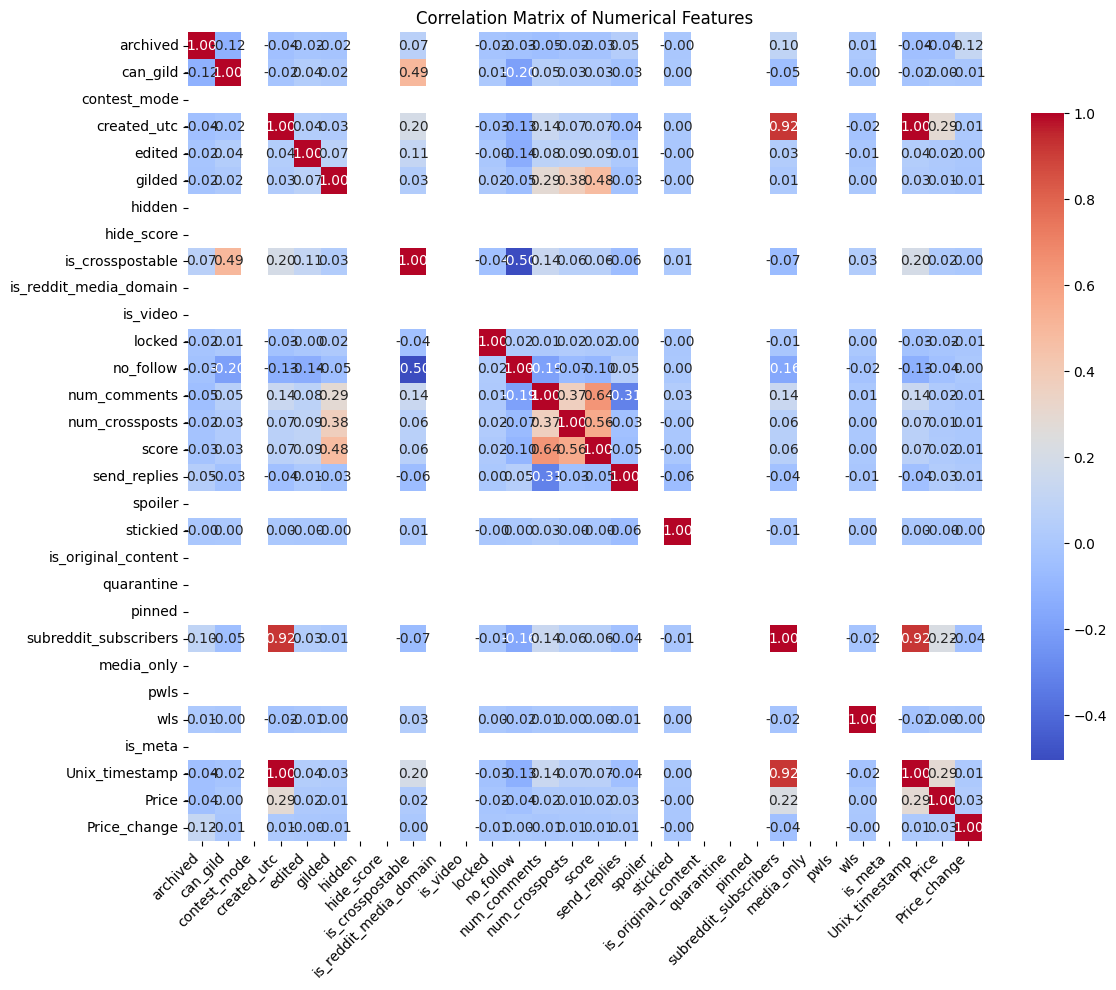

In [ ]:
import seaborn as sns
import numpy as np

# Selecting only numerical columns using select_dtypes
numerical_df = merged_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Matrix of Numerical Features')

# Adjust layout to make room for the rotated x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
merged_df.columns

Index(['archived', 'author', 'can_gild', 'contest_mode', 'created_utc',
       'domain', 'edited', 'gilded', 'hidden', 'hide_score', 'id',
       'is_crosspostable', 'is_reddit_media_domain', 'is_self', 'is_video',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_embed', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'score',
       'secure_media_embed', 'selftext', 'send_replies', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_type', 'thumbnail', 'title',
       'url', 'whitelist_status', 'is_original_content', 'quarantine',
       'pinned', 'subreddit_subscribers', 'media_only', 'pwls', 'wls',
       'is_meta', 'stock_ticker', 'Unix_timestamp', 'Stock_Ticker', 'Price',
       'Price_change'],
      dtype='object')

In [ ]:
drop_col = ['contest_mode','hidden','hide_score','is_reddit_media_domain','is_video','spoiler','is_original_content','quarantine','pinned','media_only', 'pwls','is_meta',]

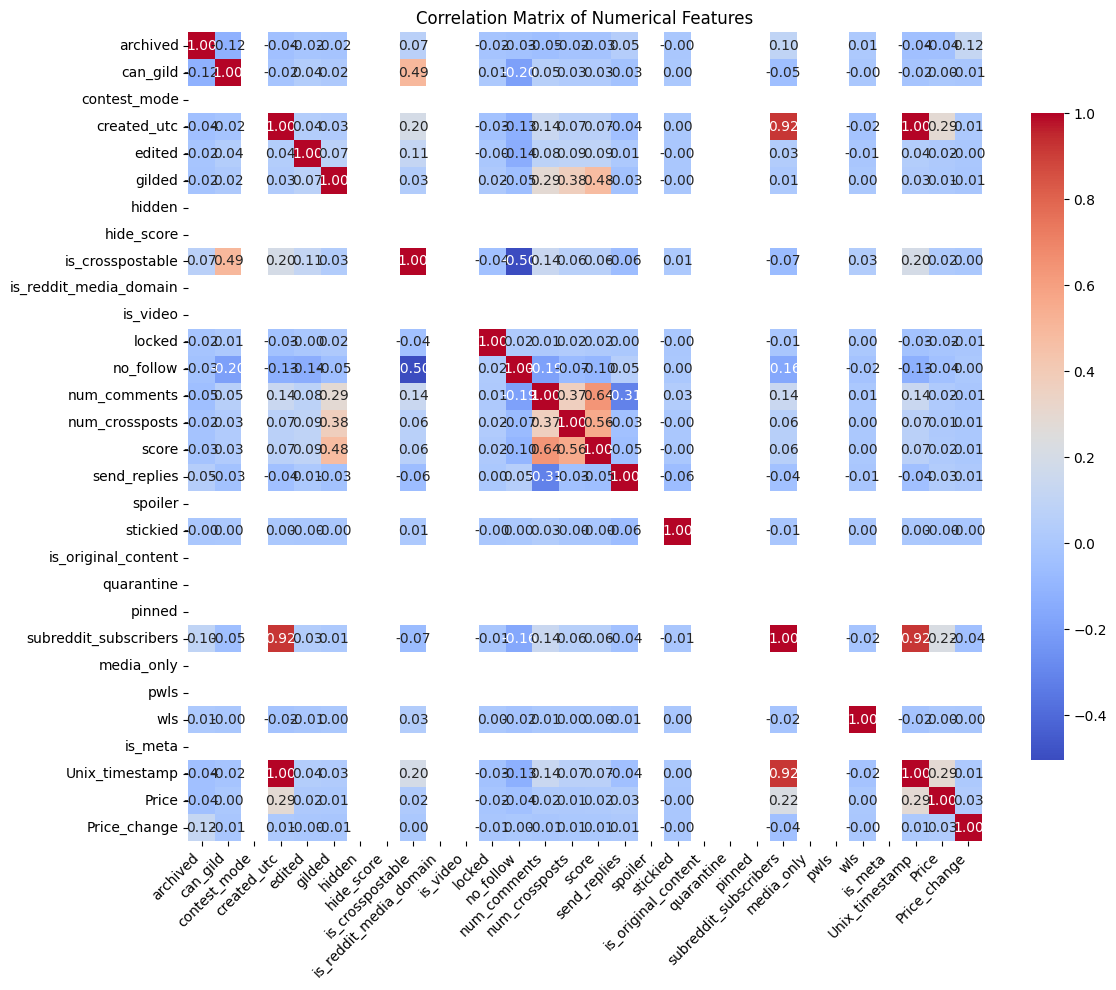

In [ ]:
import seaborn as sns
import numpy as np

# Selecting only numerical columns using select_dtypes
numerical_df = merged_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Matrix of Numerical Features')

# Adjust layout to make room for the rotated x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
merged_df = merged_df.drop(drop_col, axis=1)
merged_df

,archived,author,can_gild,created_utc,domain,edited,gilded,id,is_crosspostable,is_self,...,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Unix_timestamp,Stock_Ticker,Price,Price_change
0,1.00,[deleted],0.00,1226275200,self.stocks,0,0.00,7cji8,0.00,True,...,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,1226275200,AMD,3.04,-1.02
1,1.00,StockMarketFunding,1.00,1227225600,stockmarketfunding.com,0,0.00,7et8y,1.00,False,...,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,1227225600,FSLR,92.81,60.90
2,1.00,StockMarketFunding,1.00,1228867200,stockmarketfunding.com,0,0.00,7ilcm,0.00,False,...,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,1228867200,CME,24.56,-5.84
3,1.00,EconomyGuy,1.00,1229299200,stockmarketfunding.com,0,0.00,7jlox,0.00,False,...,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,1229299200,FSLR,111.20,34.68
4,1.00,StockMarketFunding,1.00,1233187200,stockmarketfunding.com,0,0.00,7tclr,1.00,False,...,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,1233187200,JPM,17.41,-1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,1.00,1672272000,self.stocks,0,0.00,zykvlh,1.00,True,...,Investing in the bad guys? (anti ESG),https://www.reddit.com/r/stocks/comments/zykvl...,all_ads,5045461.00,6.00,GOOGL,1672272000,GOOGL,88.45,6.12
15998,0.00,joshyuaaa,1.00,1672358400,self.stocks,0,0.00,zypknu,0.00,True,...,If everyone sold their TSLA stock would it ban...,https://www.reddit.com/r/stocks/comments/zypkn...,all_ads,5045457.00,6.00,TSLA,1672358400,TSLA,123.18,71.46
15999,0.00,[deleted],0.00,1672358400,NaN,0,0.00,zzcd3d,0.00,True,...,TSLA - Make or break moment? Q4 Deliveries and...,NaN,all_ads,5045444.00,6.00,TSLA,1672358400,TSLA,123.18,71.46
16000,0.00,AutoModerator,1.00,1672358400,self.stocks,0,0.00,zyxbx0,1.00,True,...,r/Stocks Daily Discussion &amp; Fundamentals F...,https://www.reddit.com/r/stocks/comments/zyxbx...,all_ads,5045453.00,6.00,PEG,1672358400,PEG,58.47,0.04


In [ ]:
merged_df.to_csv(f'/content/drive/Shareddrives/GWAR/final_merged.tsv', sep='\t',index=False, escapechar='\\')

In [ ]:
merged_df = pd.read_csv(f'/content/drive/Shareddrives/GWAR/final_merged.tsv', sep='\t')

In [ ]:
merged_df.head()

,archived,author,can_gild,created_utc,domain,edited,gilded,id,is_crosspostable,is_self,...,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Unix_timestamp,Stock_Ticker,Price,Price_change
0,1.00,[deleted],0.00,1226275200,self.stocks,0,0.00,7cji8,0.00,True,...,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,1226275200,AMD,3.04,-1.02
1,1.00,StockMarketFunding,1.00,1227225600,stockmarketfunding.com,0,0.00,7et8y,1.00,False,...,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,1227225600,FSLR,92.81,60.90
2,1.00,StockMarketFunding,1.00,1228867200,stockmarketfunding.com,0,0.00,7ilcm,0.00,False,...,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,1228867200,CME,24.56,-5.84
3,1.00,EconomyGuy,1.00,1229299200,stockmarketfunding.com,0,0.00,7jlox,0.00,False,...,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,1229299200,FSLR,111.20,34.68
4,1.00,StockMarketFunding,1.00,1233187200,stockmarketfunding.com,0,0.00,7tclr,1.00,False,...,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,1233187200,JPM,17.41,-1.53


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16002 entries, 0 to 16001
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   archived                 15602 non-null  float64
 1   author                   16002 non-null  object 
 2   can_gild                 12436 non-null  float64
 3   created_utc              16002 non-null  int64  
 4   domain                   15941 non-null  object 
 5   edited                   16002 non-null  int64  
 6   gilded                   15892 non-null  float64
 7   id                       16002 non-null  object 
 8   is_crosspostable         13213 non-null  float64
 9   is_self                  16002 non-null  bool   
 10  link_flair_richtext      12220 non-null  object 
 11  link_flair_text_color    12217 non-null  object 
 12  link_flair_type          12220 non-null  object 
 13  locked                   14754 non-null  float64
 14  media_embed           

In [ ]:
merged_df.describe()

,archived,can_gild,created_utc,edited,gilded,is_crosspostable,locked,no_follow,num_comments,num_crossposts,score,send_replies,stickied,subreddit_subscribers,wls,Unix_timestamp,Price,Price_change
count,15602.00,12436.00,16002.00,16002.00,15892.00,13213.00,14754.00,12488.00,16002.00,13213.00,16002.00,12488.00,15892.00,12324.00,12200.00,16002.00,16002.00,16002.00
mean,0.24,0.88,1568311040.72,162244015.56,0.01,0.68,0.00,0.44,30.31,0.04,42.34,0.96,0.00,2415028.08,6.00,1568311040.72,103.14,1.87
std,0.43,0.32,72527016.99,479181296.72,0.11,0.47,0.06,0.50,119.22,0.40,395.01,0.20,0.01,1461460.26,0.08,72527016.99,114.36,21.08
min,0.00,0.00,1226275200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,228007.00,3.00,1226275200.00,1.71,-269.25
25%,0.00,1.00,1528156800.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,615530.50,6.00,1528156800.00,35.98,-2.77
50%,0.00,1.00,1591228800.00,0.00,0.00,1.00,0.00,0.00,7.00,0.00,2.00,1.00,0.00,2716689.00,6.00,1591228800.00,67.25,1.12
75%,0.00,1.00,1615248000.00,0.00,0.00,1.00,0.00,1.00,20.00,0.00,10.00,1.00,0.00,2910079.50,6.00,1615248000.00,137.03,6.44
max,1.00,1.00,1672358400.00,1671697393.00,7.00,1.00,1.00,1.00,5658.00,24.00,26564.00,1.00,1.00,5048036.00,6.00,1672358400.00,3994.22,865.63


In [ ]:
# merged_df = merged_df.drop('Unnamed: 0', axis=1)
# merged_df

In [ ]:
merged_df = merged_df.drop('created_utc', axis=1)
merged_df

,archived,author,can_gild,domain,edited,gilded,id,is_crosspostable,is_self,link_flair_richtext,...,subreddit_type,thumbnail,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Stock_Ticker,Price_change
0,1.00,[deleted],0.00,self.stocks,0,0.00,7cji8,0.00,True,[],...,public,default,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,AMD,-1.02
1,1.00,StockMarketFunding,1.00,stockmarketfunding.com,0,0.00,7et8y,1.00,False,[],...,public,default,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,FSLR,60.90
2,1.00,StockMarketFunding,1.00,stockmarketfunding.com,0,0.00,7ilcm,0.00,False,[],...,public,default,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,CME,-5.84
3,1.00,EconomyGuy,1.00,stockmarketfunding.com,0,0.00,7jlox,0.00,False,[],...,public,default,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,FSLR,34.68
4,1.00,StockMarketFunding,1.00,stockmarketfunding.com,0,0.00,7tclr,1.00,False,[],...,public,default,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,JPM,-1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,1.00,self.stocks,0,0.00,zykvlh,1.00,True,[],...,public,self,Investing in the bad guys? (anti ESG),https://www.reddit.com/r/stocks/comments/zykvl...,all_ads,5045461.00,6.00,GOOGL,GOOGL,6.12
15998,0.00,joshyuaaa,1.00,self.stocks,0,0.00,zypknu,0.00,True,[],...,public,default,If everyone sold their TSLA stock would it ban...,https://www.reddit.com/r/stocks/comments/zypkn...,all_ads,5045457.00,6.00,TSLA,TSLA,71.46
15999,0.00,[deleted],0.00,NaN,0,0.00,zzcd3d,0.00,True,[],...,public,default,TSLA - Make or break moment? Q4 Deliveries and...,NaN,all_ads,5045444.00,6.00,TSLA,TSLA,71.46
16000,0.00,AutoModerator,1.00,self.stocks,0,0.00,zyxbx0,1.00,True,[],...,public,self,r/Stocks Daily Discussion &amp; Fundamentals F...,https://www.reddit.com/r/stocks/comments/zyxbx...,all_ads,5045453.00,6.00,PEG,PEG,0.04


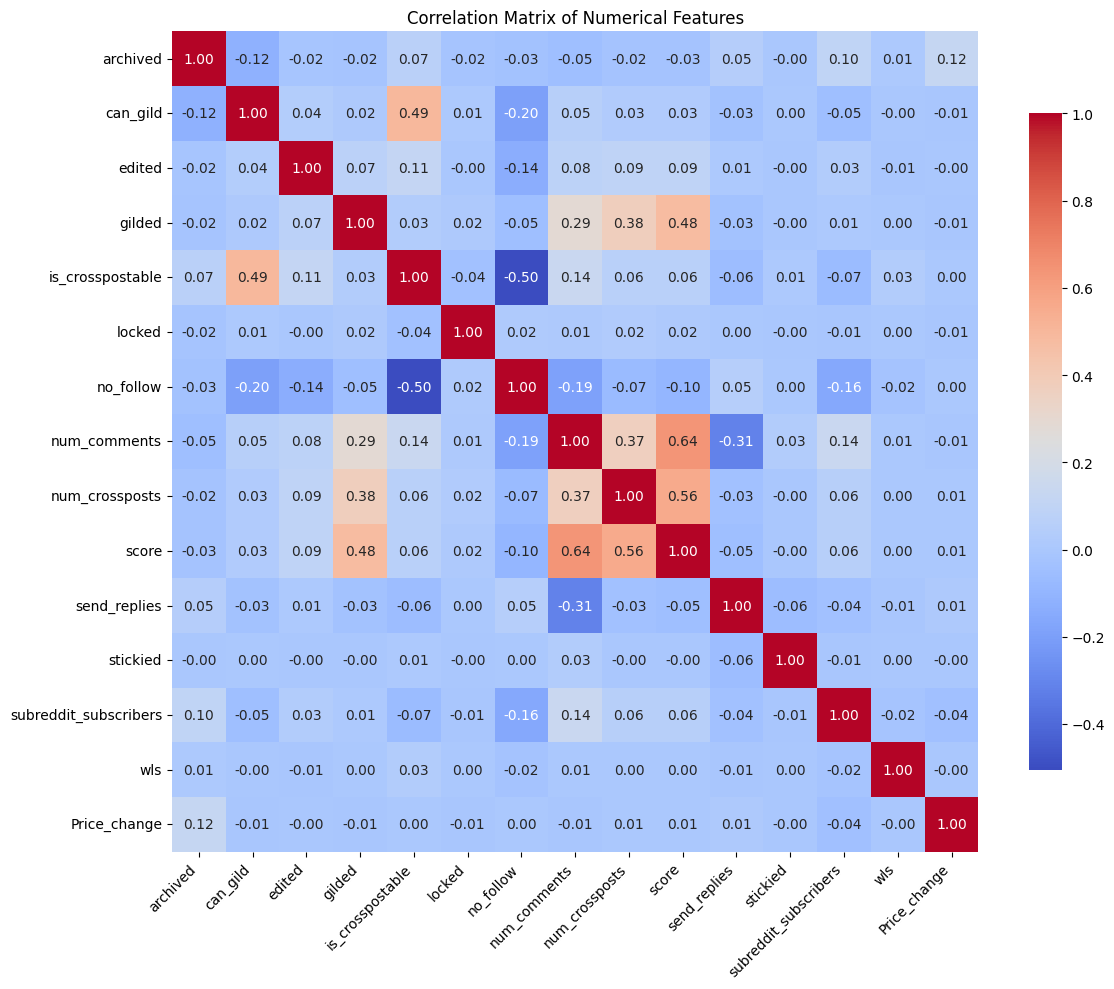

In [ ]:
numerical_df = merged_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Matrix of Numerical Features')

# Adjust layout to make room for the rotated x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
merged_df_with_absolute_price= merged_df.copy()

In [ ]:
merged_df_with_absolute_price

,archived,author,can_gild,created_utc,domain,edited,gilded,id,is_crosspostable,is_self,...,thumbnail,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Unix_timestamp,Stock_Ticker,Price_change
0,1.00,[deleted],0.00,1226275200,self.stocks,0,0.00,7cji8,0.00,True,...,default,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,1226275200,AMD,-1.02
1,1.00,StockMarketFunding,1.00,1227225600,stockmarketfunding.com,0,0.00,7et8y,1.00,False,...,default,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,1227225600,FSLR,60.90
2,1.00,StockMarketFunding,1.00,1228867200,stockmarketfunding.com,0,0.00,7ilcm,0.00,False,...,default,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,1228867200,CME,-5.84
3,1.00,EconomyGuy,1.00,1229299200,stockmarketfunding.com,0,0.00,7jlox,0.00,False,...,default,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,1229299200,FSLR,34.68
4,1.00,StockMarketFunding,1.00,1233187200,stockmarketfunding.com,0,0.00,7tclr,1.00,False,...,default,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,1233187200,JPM,-1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,1.00,1672272000,self.stocks,0,0.00,zykvlh,1.00,True,...,self,Investing in the bad guys? (anti ESG),https://www.reddit.com/r/stocks/comments/zykvl...,all_ads,5045461.00,6.00,GOOGL,1672272000,GOOGL,6.12
15998,0.00,joshyuaaa,1.00,1672358400,self.stocks,0,0.00,zypknu,0.00,True,...,default,If everyone sold their TSLA stock would it ban...,https://www.reddit.com/r/stocks/comments/zypkn...,all_ads,5045457.00,6.00,TSLA,1672358400,TSLA,71.46
15999,0.00,[deleted],0.00,1672358400,NaN,0,0.00,zzcd3d,0.00,True,...,default,TSLA - Make or break moment? Q4 Deliveries and...,NaN,all_ads,5045444.00,6.00,TSLA,1672358400,TSLA,71.46
16000,0.00,AutoModerator,1.00,1672358400,self.stocks,0,0.00,zyxbx0,1.00,True,...,self,r/Stocks Daily Discussion &amp; Fundamentals F...,https://www.reddit.com/r/stocks/comments/zyxbx...,all_ads,5045453.00,6.00,PEG,1672358400,PEG,0.04


In [ ]:
merged_df_with_absolute_price['Price_change'] = merged_df_with_absolute_price['Price_change'].abs()
merged_df_with_absolute_price


,archived,author,can_gild,created_utc,domain,edited,gilded,id,is_crosspostable,is_self,...,thumbnail,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Unix_timestamp,Stock_Ticker,Price_change
0,1.00,[deleted],0.00,1226275200,self.stocks,0,0.00,7cji8,0.00,True,...,default,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,1226275200,AMD,1.02
1,1.00,StockMarketFunding,1.00,1227225600,stockmarketfunding.com,0,0.00,7et8y,1.00,False,...,default,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,1227225600,FSLR,60.90
2,1.00,StockMarketFunding,1.00,1228867200,stockmarketfunding.com,0,0.00,7ilcm,0.00,False,...,default,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,1228867200,CME,5.84
3,1.00,EconomyGuy,1.00,1229299200,stockmarketfunding.com,0,0.00,7jlox,0.00,False,...,default,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,1229299200,FSLR,34.68
4,1.00,StockMarketFunding,1.00,1233187200,stockmarketfunding.com,0,0.00,7tclr,1.00,False,...,default,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,1233187200,JPM,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,1.00,1672272000,self.stocks,0,0.00,zykvlh,1.00,True,...,self,Investing in the bad guys? (anti ESG),https://www.reddit.com/r/stocks/comments/zykvl...,all_ads,5045461.00,6.00,GOOGL,1672272000,GOOGL,6.12
15998,0.00,joshyuaaa,1.00,1672358400,self.stocks,0,0.00,zypknu,0.00,True,...,default,If everyone sold their TSLA stock would it ban...,https://www.reddit.com/r/stocks/comments/zypkn...,all_ads,5045457.00,6.00,TSLA,1672358400,TSLA,71.46
15999,0.00,[deleted],0.00,1672358400,NaN,0,0.00,zzcd3d,0.00,True,...,default,TSLA - Make or break moment? Q4 Deliveries and...,NaN,all_ads,5045444.00,6.00,TSLA,1672358400,TSLA,71.46
16000,0.00,AutoModerator,1.00,1672358400,self.stocks,0,0.00,zyxbx0,1.00,True,...,self,r/Stocks Daily Discussion &amp; Fundamentals F...,https://www.reddit.com/r/stocks/comments/zyxbx...,all_ads,5045453.00,6.00,PEG,1672358400,PEG,0.04


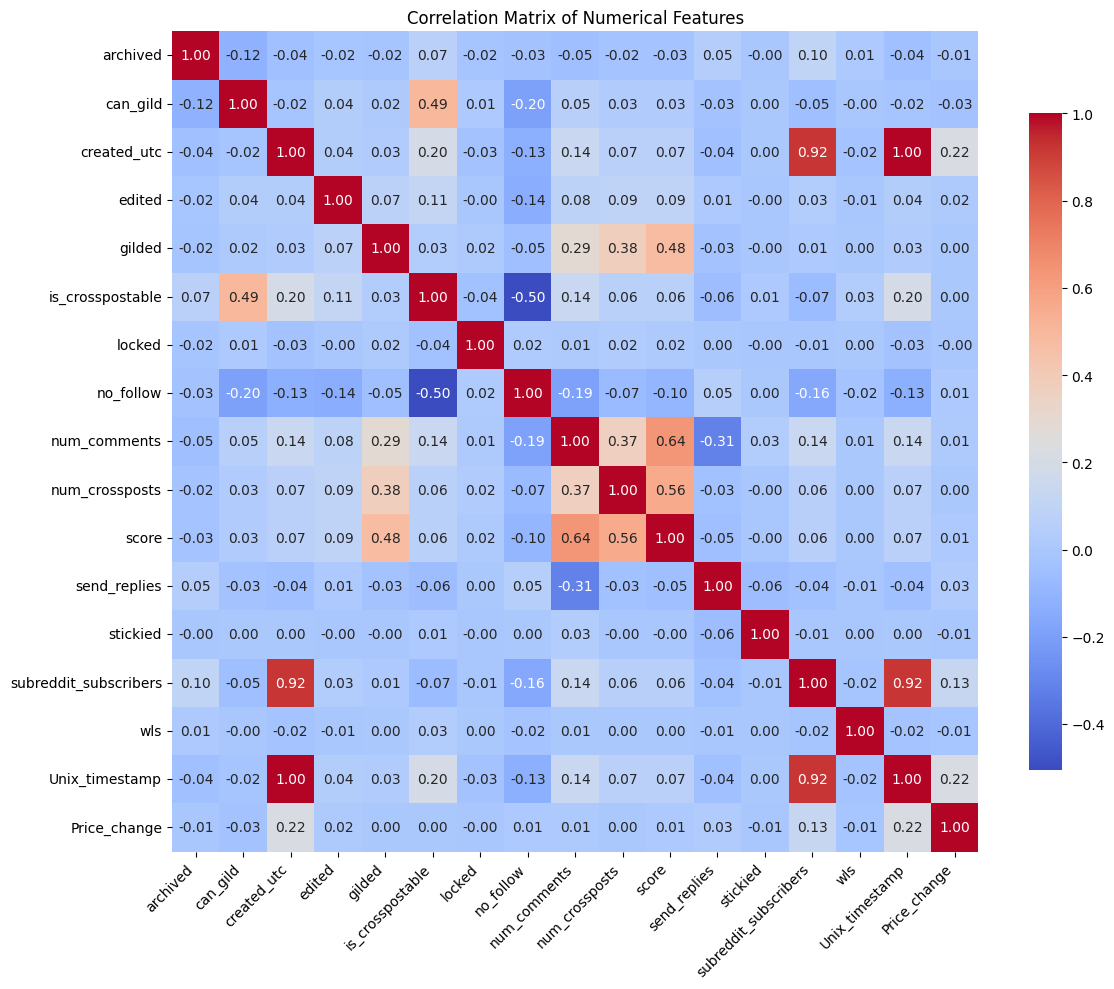

In [ ]:
numerical_merged_df_with_absolute_price = merged_df_with_absolute_price.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix_with_absolute_price = numerical_merged_df_with_absolute_price.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr_matrix_with_absolute_price, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Matrix of Numerical Features')

# Adjust layout to make room for the rotated x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Assuming df is your DataFrame and you want to scale all numeric columns
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

# Now df has the standardized numeric columns


In [ ]:
merged_df

,archived,author,can_gild,created_utc,domain,edited,gilded,id,is_crosspostable,is_self,...,thumbnail,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Unix_timestamp,Stock_Ticker,Price_change
0,1.00,[deleted],0.00,0.00,self.stocks,0.00,0.00,7cji8,0.00,True,...,default,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,0.00,AMD,0.24
1,1.00,StockMarketFunding,1.00,0.00,stockmarketfunding.com,0.00,0.00,7et8y,1.00,False,...,default,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,0.00,FSLR,0.29
2,1.00,StockMarketFunding,1.00,0.01,stockmarketfunding.com,0.00,0.00,7ilcm,0.00,False,...,default,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,0.01,CME,0.23
3,1.00,EconomyGuy,1.00,0.01,stockmarketfunding.com,0.00,0.00,7jlox,0.00,False,...,default,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,0.01,FSLR,0.27
4,1.00,StockMarketFunding,1.00,0.02,stockmarketfunding.com,0.00,0.00,7tclr,1.00,False,...,default,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,0.02,JPM,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,1.00,1.00,self.stocks,0.00,0.00,zykvlh,1.00,True,...,self,Investing in the bad guys? (anti ESG),https://www.reddit.com/r/stocks/comments/zykvl...,all_ads,1.00,1.00,GOOGL,1.00,GOOGL,0.24
15998,0.00,joshyuaaa,1.00,1.00,self.stocks,0.00,0.00,zypknu,0.00,True,...,default,If everyone sold their TSLA stock would it ban...,https://www.reddit.com/r/stocks/comments/zypkn...,all_ads,1.00,1.00,TSLA,1.00,TSLA,0.30
15999,0.00,[deleted],0.00,1.00,NaN,0.00,0.00,zzcd3d,0.00,True,...,default,TSLA - Make or break moment? Q4 Deliveries and...,NaN,all_ads,1.00,1.00,TSLA,1.00,TSLA,0.30
16000,0.00,AutoModerator,1.00,1.00,self.stocks,0.00,0.00,zyxbx0,1.00,True,...,self,r/Stocks Daily Discussion &amp; Fundamentals F...,https://www.reddit.com/r/stocks/comments/zyxbx...,all_ads,1.00,1.00,PEG,1.00,PEG,0.24


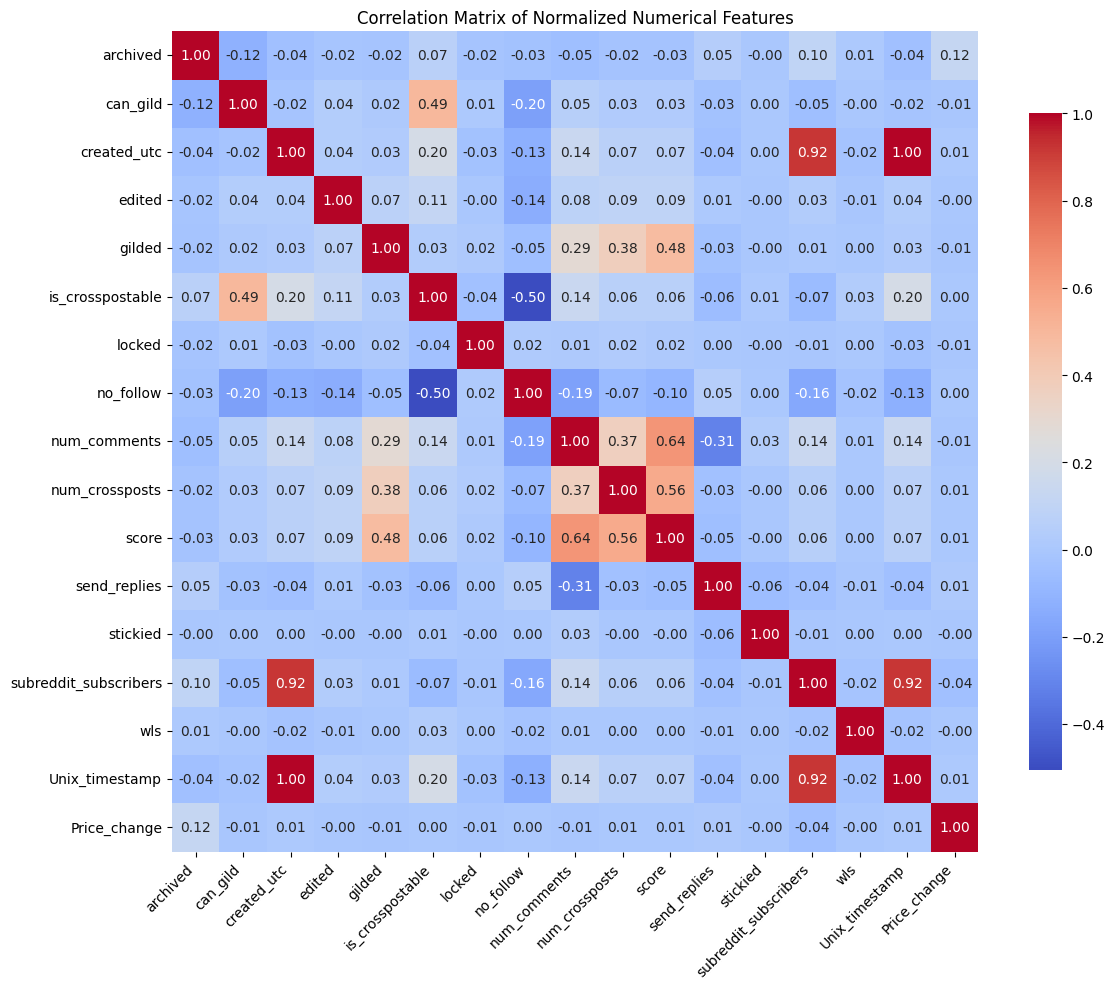

In [ ]:
normalized_numerical_df = merged_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
normalized_corr_matrix = normalized_numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(normalized_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Matrix of Normalized Numerical Features')

# Adjust layout to make room for the rotated x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Assuming df is your DataFrame and you want to scale all numeric columns
numeric_columns_with_absolute_price = merged_df_with_absolute_price.select_dtypes(include=[np.number]).columns
merged_df_with_absolute_price[numeric_columns_with_absolute_price] = scaler.fit_transform(merged_df_with_absolute_price[numeric_columns_with_absolute_price])

# Now df has the standardized numeric columns
merged_df_with_absolute_price

,archived,author,can_gild,created_utc,domain,edited,gilded,id,is_crosspostable,is_self,...,thumbnail,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Unix_timestamp,Stock_Ticker,Price_change
0,1.00,[deleted],0.00,0.00,self.stocks,0.00,0.00,7cji8,0.00,True,...,default,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,0.00,AMD,0.00
1,1.00,StockMarketFunding,1.00,0.00,stockmarketfunding.com,0.00,0.00,7et8y,1.00,False,...,default,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,0.00,FSLR,0.07
2,1.00,StockMarketFunding,1.00,0.01,stockmarketfunding.com,0.00,0.00,7ilcm,0.00,False,...,default,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,0.01,CME,0.01
3,1.00,EconomyGuy,1.00,0.01,stockmarketfunding.com,0.00,0.00,7jlox,0.00,False,...,default,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,0.01,FSLR,0.04
4,1.00,StockMarketFunding,1.00,0.02,stockmarketfunding.com,0.00,0.00,7tclr,1.00,False,...,default,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,0.02,JPM,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,AlternativeOwn3387,1.00,1.00,self.stocks,0.00,0.00,zykvlh,1.00,True,...,self,Investing in the bad guys? (anti ESG),https://www.reddit.com/r/stocks/comments/zykvl...,all_ads,1.00,1.00,GOOGL,1.00,GOOGL,0.01
15998,0.00,joshyuaaa,1.00,1.00,self.stocks,0.00,0.00,zypknu,0.00,True,...,default,If everyone sold their TSLA stock would it ban...,https://www.reddit.com/r/stocks/comments/zypkn...,all_ads,1.00,1.00,TSLA,1.00,TSLA,0.08
15999,0.00,[deleted],0.00,1.00,NaN,0.00,0.00,zzcd3d,0.00,True,...,default,TSLA - Make or break moment? Q4 Deliveries and...,NaN,all_ads,1.00,1.00,TSLA,1.00,TSLA,0.08
16000,0.00,AutoModerator,1.00,1.00,self.stocks,0.00,0.00,zyxbx0,1.00,True,...,self,r/Stocks Daily Discussion &amp; Fundamentals F...,https://www.reddit.com/r/stocks/comments/zyxbx...,all_ads,1.00,1.00,PEG,1.00,PEG,0.00


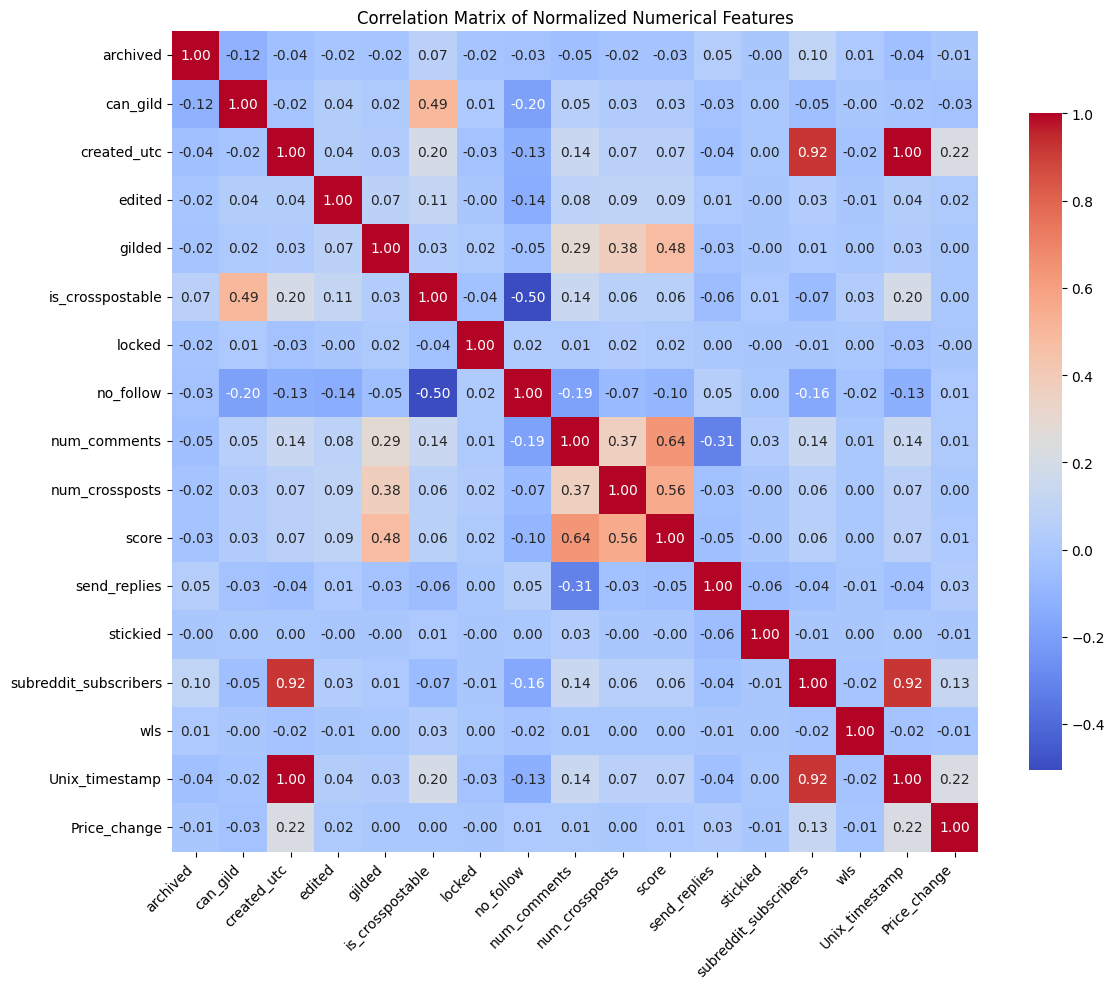

In [ ]:
normalized_numerical_merged_df_with_absolute_price = merged_df_with_absolute_price.select_dtypes(include=[np.number])

# Compute the correlation matrix
normalized_corr_matrix_with_absolute_price = normalized_numerical_merged_df_with_absolute_price.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(normalized_corr_matrix_with_absolute_price, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Add title
plt.title('Correlation Matrix of Normalized Numerical Features')

# Adjust layout to make room for the rotated x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
merged_df.columns

Index(['archived', 'author', 'can_gild', 'created_utc', 'domain', 'edited',
       'gilded', 'id', 'is_crosspostable', 'is_self', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_embed',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'score', 'secure_media_embed',
       'selftext', 'send_replies', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_type', 'thumbnail', 'title', 'url', 'whitelist_status',
       'subreddit_subscribers', 'wls', 'stock_ticker', 'Unix_timestamp',
       'Stock_Ticker', 'Price_change'],
      dtype='object')

# ML model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df =  pd.read_csv("/content/drive/Shareddrives/GWAR/final_merged.tsv",sep = '\t')

In [ ]:
df.head()

,archived,author,can_gild,created_utc,domain,edited,gilded,id,is_crosspostable,is_self,...,title,url,whitelist_status,subreddit_subscribers,wls,stock_ticker,Unix_timestamp,Stock_Ticker,Price,Price_change
0,1.00,[deleted],0.00,1226275200,self.stocks,0,0.00,7cji8,0.00,True,...,Why does Apple not aquire AMD (market cap 1.85...,https://www.reddit.com/r/stocks/comments/7cji8...,all_ads,NaN,NaN,AMD,1226275200,AMD,3.04,-1.02
1,1.00,StockMarketFunding,1.00,1227225600,stockmarketfunding.com,0,0.00,7et8y,1.00,False,...,Kaufman lowers tgts and estimates on SPWRA and...,http://www.stockmarketfunding.com/SMF-Blogs/St...,all_ads,NaN,NaN,FSLR,1227225600,FSLR,92.81,60.90
2,1.00,StockMarketFunding,1.00,1228867200,stockmarketfunding.com,0,0.00,7ilcm,0.00,False,...,CME Group: Take-aways from management call,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,CME,1228867200,CME,24.56,-5.84
3,1.00,EconomyGuy,1.00,1229299200,stockmarketfunding.com,0,0.00,7jlox,0.00,False,...,FSLR First Solar: Estimates sensitive to ASP c...,http://www.stockmarketfunding.com/SMF-Blogs/Fu...,all_ads,NaN,NaN,FSLR,1229299200,FSLR,111.20,34.68
4,1.00,StockMarketFunding,1.00,1233187200,stockmarketfunding.com,0,0.00,7tclr,1.00,False,...,JPM JP Morgan Chase exited Madoff-linked funds...,http://www.stockmarketfunding.com/SMF-Blogs/Ho...,all_ads,NaN,NaN,JPM,1233187200,JPM,17.41,-1.53


In [ ]:
df['wls'].unique()

array([nan,  6.,  3.])

In [ ]:
df.columns

Index(['archived', 'author', 'can_gild', 'created_utc', 'domain', 'edited',
       'gilded', 'id', 'is_crosspostable', 'is_self', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_embed',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'score', 'secure_media_embed',
       'selftext', 'send_replies', 'subreddit', 'subreddit_id',
       'subreddit_type', 'thumbnail', 'title', 'url', 'whitelist_status',
       'subreddit_subscribers', 'wls', 'stock_ticker', 'Unix_timestamp',
       'Stock_Ticker', 'Price', 'Price_change'],
      dtype='object')

In [ ]:
drop_not_imp = ['author','created_utc','domain','id','stock_ticker','Unix_timestamp','Stock_Ticker','Price','url','subreddit_subscribers','permalink','media_embed','secure_media_embed','secure_media_embed','thumbnail']
df.drop(drop_not_imp,axis = 1,inplace= True)

In [ ]:
def convert_number(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [ ]:
df['Price_change'] = df['Price_change'].apply(convert_number)

In [ ]:
df.head()

,archived,can_gild,edited,gilded,is_crosspostable,is_self,link_flair_richtext,link_flair_text_color,link_flair_type,locked,...,selftext,send_replies,stickied,subreddit,subreddit_id,subreddit_type,title,whitelist_status,wls,Price_change
0,1.00,0.00,0,0.00,0.00,True,[],dark,text,0.00,...,[deleted],1.00,0.00,stocks,t5_2qjfk,public,Why does Apple not aquire AMD (market cap 1.85...,all_ads,NaN,-1
1,1.00,1.00,0,0.00,1.00,False,[],dark,text,0.00,...,NaN,1.00,0.00,stocks,t5_2qjfk,public,Kaufman lowers tgts and estimates on SPWRA and...,all_ads,NaN,1
2,1.00,1.00,0,0.00,0.00,False,[],dark,text,0.00,...,NaN,1.00,0.00,stocks,t5_2qjfk,public,CME Group: Take-aways from management call,all_ads,NaN,-1
3,1.00,1.00,0,0.00,0.00,False,[],dark,text,0.00,...,NaN,1.00,0.00,stocks,t5_2qjfk,public,FSLR First Solar: Estimates sensitive to ASP c...,all_ads,NaN,1
4,1.00,1.00,0,0.00,1.00,False,[],dark,text,0.00,...,NaN,1.00,0.00,stocks,t5_2qjfk,public,JPM JP Morgan Chase exited Madoff-linked funds...,all_ads,NaN,-1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16002 entries, 0 to 16001
Data columns (total 76 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   edited                                                         16002 non-null  int64
 1   is_self                                                        16002 non-null  bool 
 2   num_comments                                                   16002 non-null  int64
 3   over_18                                                        16002 non-null  bool 
 4   score                                                          16002 non-null  int64
 5   Price_change                                                   16002 non-null  int64
 6   archived_0.0                                                   16002 non-null  bool 
 7   archived_1.0                                                   16002 non-nul

In [ ]:
df.describe()

,edited,num_comments,score,Price_change
count,16002.00,16002.00,16002.00,16002.00
mean,162244015.56,30.31,42.34,0.18
std,479181296.72,119.22,395.01,0.98
min,0.00,0.00,0.00,-1.00
25%,0.00,1.00,1.00,-1.00
50%,0.00,7.00,2.00,1.00
75%,0.00,20.00,10.00,1.00
max,1671697393.00,5658.00,26564.00,1.00


In [ ]:
df.fillna('',inplace=True)

In [ ]:
df

,archived,can_gild,edited,gilded,is_crosspostable,is_self,link_flair_richtext,link_flair_text_color,link_flair_type,locked,...,selftext,send_replies,stickied,subreddit,subreddit_id,subreddit_type,title,whitelist_status,wls,Price_change
0,1.00,0.00,0,0.00,0.00,True,[],dark,text,0.00,...,[deleted],1.00,0.00,stocks,t5_2qjfk,public,Why does Apple not aquire AMD (market cap 1.85...,all_ads,,-1
1,1.00,1.00,0,0.00,1.00,False,[],dark,text,0.00,...,,1.00,0.00,stocks,t5_2qjfk,public,Kaufman lowers tgts and estimates on SPWRA and...,all_ads,,1
2,1.00,1.00,0,0.00,0.00,False,[],dark,text,0.00,...,,1.00,0.00,stocks,t5_2qjfk,public,CME Group: Take-aways from management call,all_ads,,-1
3,1.00,1.00,0,0.00,0.00,False,[],dark,text,0.00,...,,1.00,0.00,stocks,t5_2qjfk,public,FSLR First Solar: Estimates sensitive to ASP c...,all_ads,,1
4,1.00,1.00,0,0.00,1.00,False,[],dark,text,0.00,...,,1.00,0.00,stocks,t5_2qjfk,public,JPM JP Morgan Chase exited Madoff-linked funds...,all_ads,,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,0.00,1.00,0,0.00,1.00,True,[],dark,text,0.00,...,With all the hype of ESG and intentionally inv...,1.00,0.00,stocks,t5_2qjfk,public,Investing in the bad guys? (anti ESG),all_ads,6.00,1
15998,0.00,1.00,0,0.00,0.00,True,[],dark,text,0.00,...,[removed],1.00,0.00,stocks,t5_2qjfk,public,If everyone sold their TSLA stock would it ban...,all_ads,6.00,1
15999,0.00,0.00,0,0.00,0.00,True,[],dark,text,0.00,...,[removed],1.00,0.00,stocks,t5_2qjfk,public,TSLA - Make or break moment? Q4 Deliveries and...,all_ads,6.00,1
16000,0.00,1.00,0,0.00,1.00,True,[],dark,text,0.00,...,"This is the daily discussion, so anything stoc...",0.00,0.00,stocks,t5_2qjfk,public,r/Stocks Daily Discussion &amp; Fundamentals F...,all_ads,6.00,1


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
df['title'] = vectorizer.fit(df['title'])

In [ ]:
df['selftext'] = vectorizer.fit(df['selftext'])

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.to_csv(f'/content/drive/Shareddrives/GWAR/final_final.tsv', sep='\t',index=False, escapechar='\\')

In [ ]:
df.shape

(16002, 76)

In [ ]:
import pandas as pd
df = pd.read_csv(f'/content/drive/Shareddrives/GWAR/final_final.tsv', sep='\t')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
y = df['Price_change']

In [ ]:
X = df.drop('Price_change',axis = 1)


In [ ]:
numeric_columns_with_absolute_price = df.select_dtypes(include=[np.number]).columns

In [ ]:
numeric_columns_with_absolute_price

Index(['edited', 'num_comments', 'score', 'Price_change'], dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

Training and evaluating Random Forest...
Test performance for Random Forest:
              precision    recall  f1-score   support

          -1       0.41      0.31      0.35      1276
           0       0.00      0.00      0.00        27
           1       0.60      0.70      0.65      1897

    accuracy                           0.54      3200
   macro avg       0.34      0.34      0.33      3200
weighted avg       0.52      0.54      0.52      3200

Validation performance for Random Forest:
              precision    recall  f1-score   support

          -1       0.43      0.31      0.36      1300
           0       0.00      0.00      0.00        20
           1       0.60      0.71      0.65      1881

    accuracy                           0.55      3201
   macro avg       0.34      0.34      0.34      3201
weighted avg       0.53      0.55      0.53      3201



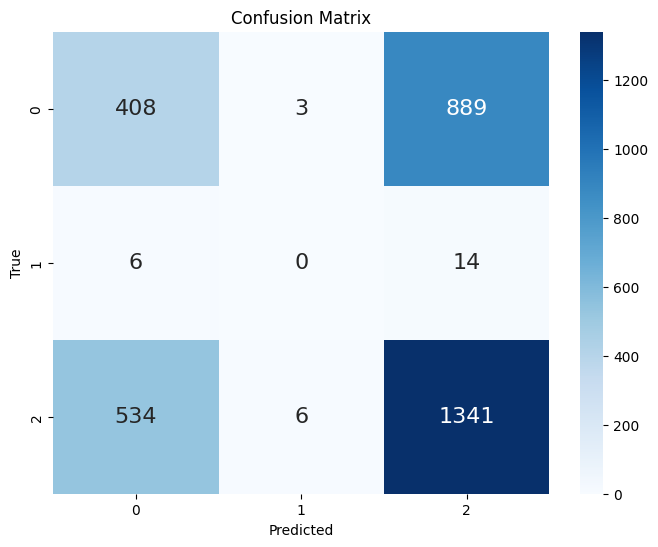

Training and evaluating k-Nearest Neighbors...
Test performance for k-Nearest Neighbors:
              precision    recall  f1-score   support

          -1       0.40      0.36      0.38      1276
           0       0.00      0.00      0.00        27
           1       0.60      0.65      0.62      1897

    accuracy                           0.53      3200
   macro avg       0.33      0.34      0.33      3200
weighted avg       0.51      0.53      0.52      3200

Validation performance for k-Nearest Neighbors:
              precision    recall  f1-score   support

          -1       0.43      0.37      0.39      1300
           0       0.00      0.00      0.00        20
           1       0.60      0.66      0.63      1881

    accuracy                           0.54      3201
   macro avg       0.34      0.34      0.34      3201
weighted avg       0.53      0.54      0.53      3201



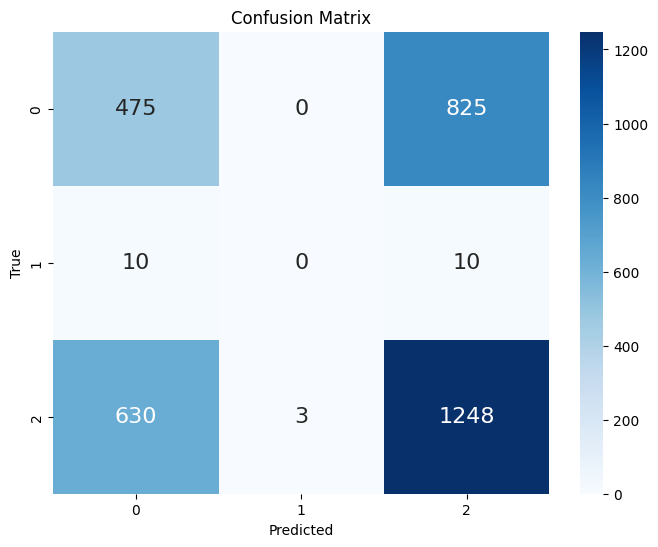

Training and evaluating Decision Tree...
Test performance for Decision Tree:
              precision    recall  f1-score   support

          -1       0.41      0.35      0.38      1276
           0       0.00      0.00      0.00        27
           1       0.60      0.66      0.63      1897

    accuracy                           0.53      3200
   macro avg       0.34      0.34      0.33      3200
weighted avg       0.52      0.53      0.52      3200

Validation performance for Decision Tree:
              precision    recall  f1-score   support

          -1       0.43      0.39      0.40      1300
           0       0.00      0.00      0.00        20
           1       0.60      0.64      0.62      1881

    accuracy                           0.53      3201
   macro avg       0.34      0.34      0.34      3201
weighted avg       0.53      0.53      0.53      3201



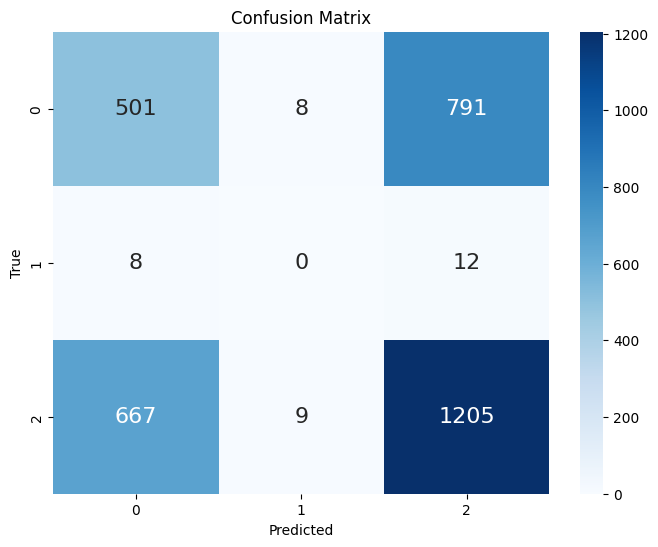

Training and evaluating Naive Bayes...
Test performance for Naive Bayes:
              precision    recall  f1-score   support

          -1       0.50      0.07      0.12      1276
           0       0.03      0.67      0.05        27
           1       0.61      0.75      0.67      1897

    accuracy                           0.48      3200
   macro avg       0.38      0.49      0.28      3200
weighted avg       0.56      0.48      0.45      3200

Validation performance for Naive Bayes:
              precision    recall  f1-score   support

          -1       0.48      0.06      0.11      1300
           0       0.02      0.75      0.04        20
           1       0.60      0.73      0.66      1881

    accuracy                           0.46      3201
   macro avg       0.37      0.52      0.27      3201
weighted avg       0.54      0.46      0.43      3201



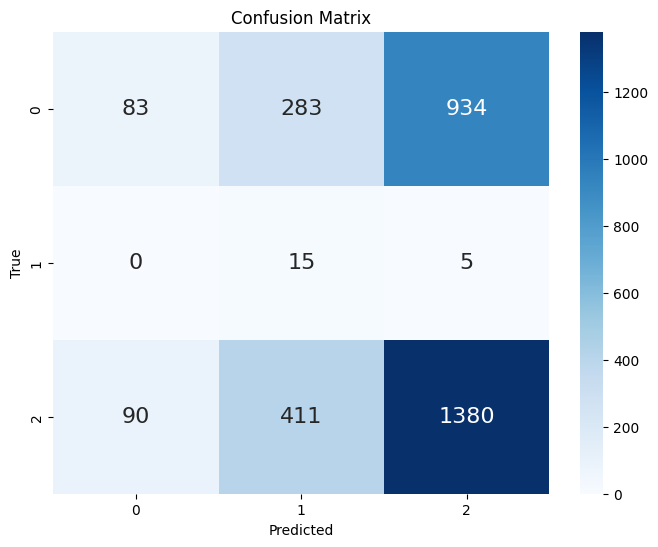

In [ ]:
# Combine preprocessing steps into a pipeline
pipeline = Pipeline([
    ('classifier', None)  # Placeholder for classifier
])


# Splitting data into training and remaining data (60% training, 40% remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting remaining data into testing and validation sets (20% testing, 20% validation)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# List of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': MultinomialNB()
}

# Training and evaluating each classifier
for name, classifier in classifiers.items():
    print(f"Training and evaluating {name}...")
    pipeline.set_params(classifier=classifier)
    pipeline.fit(X_train, y_train)
    y_pred_test = pipeline.predict(X_test)
    print(f"Test performance for {name}:")
    print(classification_report(y_test, y_pred_test))
    print("=" * 50)
    y_pred = pipeline.predict(X_val)
    print(f"Validation performance for {name}:")
    print(classification_report(y_val, y_pred))
    print("=" * 50)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


## traning

In [ ]:
# Splitting data into training and remaining data (60% training, 40% remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting remaining data into testing and validation sets (20% testing, 20% validation)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [ ]:
X_train

,edited,is_self,num_comments,over_18,score,archived_0.0,archived_1.0,archived_,can_gild_0.0,can_gild_1.0,...,subreddit_id_t5_2qjfk,subreddit_type_,subreddit_type_public,title_TfidfVectorizer(stop_words='english'),whitelist_status_,whitelist_status_all_ads,whitelist_status_promo_adult_nsfw,wls_3.0,wls_6.0,wls_
7482,0,True,0,False,1,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
6951,0,True,3,False,0,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
13926,0,True,26,False,182,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
1127,0,True,0,False,1,True,False,False,False,False,...,True,True,False,True,True,False,False,False,False,True
9798,1600311448,True,13,False,2,False,True,False,False,True,...,True,False,True,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,0,True,42,False,30,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
5390,0,True,1,False,1,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
860,0,True,7,False,2,False,True,False,False,False,...,True,True,False,True,True,False,False,False,False,True
15795,1666791626,True,174,False,289,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9601 entries, 7482 to 7270
Data columns (total 75 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   edited                                                         9601 non-null   int64
 1   is_self                                                        9601 non-null   bool 
 2   num_comments                                                   9601 non-null   int64
 3   over_18                                                        9601 non-null   bool 
 4   score                                                          9601 non-null   int64
 5   archived_0.0                                                   9601 non-null   bool 
 6   archived_1.0                                                   9601 non-null   bool 
 7   archived_                                                      9601 non-null   b

In [ ]:
X_train.describe()

,edited,num_comments,score
count,9601.00,9601.00,9601.00
mean,162298942.01,29.19,36.20
std,479206702.56,102.60,258.34
min,0.00,0.00,0.00
25%,0.00,1.00,1.00
50%,0.00,7.00,2.00
75%,0.00,19.00,10.00
max,1671697393.00,2954.00,12523.00


## test

In [ ]:
X_test.head()

,edited,is_self,num_comments,over_18,score,archived_0.0,archived_1.0,archived_,can_gild_0.0,can_gild_1.0,...,subreddit_id_t5_2qjfk,subreddit_type_,subreddit_type_public,title_TfidfVectorizer(stop_words='english'),whitelist_status_,whitelist_status_all_ads,whitelist_status_promo_adult_nsfw,wls_3.0,wls_6.0,wls_
4791,0,True,114,False,165,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
13663,0,True,1,False,1,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
7320,0,True,21,False,2,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
15574,1662006907,True,34,False,19,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
916,0,True,23,False,5,False,True,False,False,False,...,True,True,False,True,True,False,False,False,False,True


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 4791 to 4671
Data columns (total 75 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   edited                                                         3200 non-null   int64
 1   is_self                                                        3200 non-null   bool 
 2   num_comments                                                   3200 non-null   int64
 3   over_18                                                        3200 non-null   bool 
 4   score                                                          3200 non-null   int64
 5   archived_0.0                                                   3200 non-null   bool 
 6   archived_1.0                                                   3200 non-null   bool 
 7   archived_                                                      3200 non-null   b

In [ ]:
X_test.describe()

,edited,num_comments,score
count,3200.00,3200.00,3200.00
mean,158762916.28,27.92,34.51
std,475193423.41,98.13,233.33
min,0.00,0.00,0.00
25%,0.00,2.00,1.00
50%,0.00,7.00,2.00
75%,0.00,19.00,10.00
max,1671213899.00,1791.00,7011.00


## validation

In [ ]:
X_val.head()

,edited,is_self,num_comments,over_18,score,archived_0.0,archived_1.0,archived_,can_gild_0.0,can_gild_1.0,...,subreddit_id_t5_2qjfk,subreddit_type_,subreddit_type_public,title_TfidfVectorizer(stop_words='english'),whitelist_status_,whitelist_status_all_ads,whitelist_status_promo_adult_nsfw,wls_3.0,wls_6.0,wls_
12413,0,True,31,False,15,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
438,0,True,2,False,3,False,True,False,False,False,...,True,True,False,True,True,False,False,False,False,True
3218,0,True,31,False,82,True,False,False,False,False,...,True,False,True,True,False,True,False,False,False,True
15186,0,True,277,False,123,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False
13806,0,True,26,False,1,True,False,False,False,True,...,True,False,True,True,False,True,False,False,True,False


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 12413 to 5987
Data columns (total 75 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   edited                                                         3201 non-null   int64
 1   is_self                                                        3201 non-null   bool 
 2   num_comments                                                   3201 non-null   int64
 3   over_18                                                        3201 non-null   bool 
 4   score                                                          3201 non-null   int64
 5   archived_0.0                                                   3201 non-null   bool 
 6   archived_1.0                                                   3201 non-null   bool 
 7   archived_                                                      3201 non-null   

In [ ]:
X_val.describe()

,edited,num_comments,score
count,3201.00,3201.00,3201.00
mean,165559282.33,36.03,68.60
std,483184015.60,172.68,724.36
min,0.00,0.00,0.00
25%,0.00,1.00,1.00
50%,0.00,8.00,2.00
75%,0.00,21.00,10.00
max,1670992912.00,5658.00,26564.00


## model

In [ ]:
from random import randint
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 50),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None] + list(np.arange(5, 51, 5)),  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Define the RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best estimator to make predictions
predictions = random_search.predict(X_test)
print(classification_report(y_test, predictions))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best score: 0.5880635283244819
              precision    recall  f1-score   support

          -1       0.49      0.08      0.13      1276
           0       0.00      0.00      0.00        27
           1       0.60      0.95      0.74      1897

    accuracy                           0.59      3200
   macro avg       0.36      0.34      0.29      3200
weighted avg       0.55      0.59      0.49      3200



In [ ]:
import joblib

# Save the best estimator to a file
joblib.dump(random_search.best_estimator_, '/content/drive/Shareddrives/GWAR/random_forest_model.pkl')

['/content/drive/Shareddrives/GWAR/random_forest_model.pkl']

Classification report for best estimator:
              precision    recall  f1-score   support

          -1       0.49      0.07      0.13      1300
           0       0.00      0.00      0.00        20
           1       0.59      0.95      0.73      1881

    accuracy                           0.59      3201
   macro avg       0.36      0.34      0.29      3201
weighted avg       0.55      0.59      0.48      3201



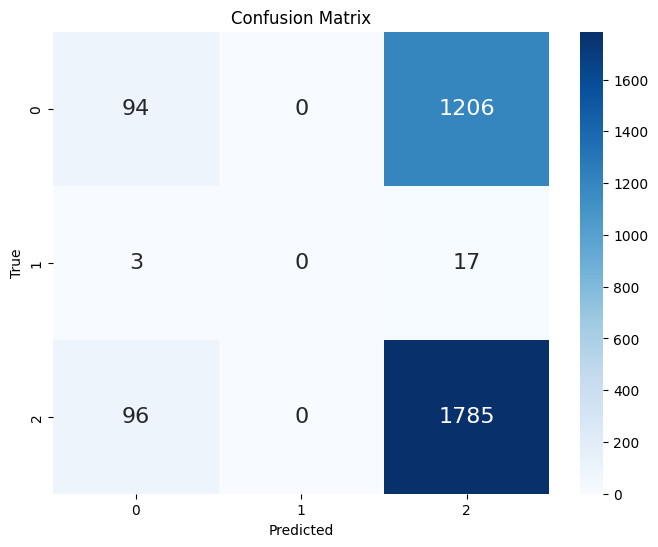

In [ ]:
# Predictions using best estimator
best_estimator = random_search.best_estimator_
predictions = best_estimator.predict(X_val)

# Classification report
print("Classification report for best estimator:")
print(classification_report(y_val, predictions))


# Confusion matrix
cm = confusion_matrix(y_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 90%|████████▉ | 26/29 [01:41<00:11,  3.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 9601, number of used features: 44
[LightGBM] [Info] Start training from score -0.887645
[LightGBM] [Info] Start training from score -4.852134
[LightGBM] [Info] Start training from score -0.543754


100%|██████████| 29/29 [01:42<00:00,  3.53s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.41               0.50    None      0.46   
BernoulliNB                        0.48               0.50    None      0.46   
QuadraticDiscriminantAnalysis      0.06               0.37    None      0.09   
GaussianNB                         0.06               0.37    None      0.08   
LinearDiscriminantAnalysis         0.59               0.37    None      0.50   
LGBMClassifier                     0.59               0.35    None      0.53   
RidgeClassifier                    0.60               0.35    None      0.50   
LogisticRegression                 0.60               0.35    None      0.50   
RidgeClassifierCV                  0.60               0.35    None      0.50   
LinearSVC                          0.60               0.35    None      0.50   
SVC                                0.59 

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.41,0.50,None,0.46,0.11
BernoulliNB,0.48,0.50,None,0.46,0.30
QuadraticDiscriminantAnalysis,0.06,0.37,None,0.09,0.16
GaussianNB,0.06,0.37,None,0.08,0.05
LinearDiscriminantAnalysis,0.59,0.37,None,0.50,0.19
LGBMClassifier,0.59,0.35,None,0.53,1.03
RidgeClassifier,0.60,0.35,None,0.50,0.10
LogisticRegression,0.60,0.35,None,0.50,0.50
RidgeClassifierCV,0.60,0.35,None,0.50,0.36


In [ ]:
import numpy as np
importances  = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
for i in sorted_indices[:10]:
    print(X_train.columns[i])

num_comments
score
edited
archived_1.0
archived_0.0
no_follow_0.0
no_follow_1.0
can_gild_1.0
can_gild_0.0
is_crosspostable_0.0
